In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [3]:
# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

**Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.**


In [15]:
Customers = pd.read_csv("Customer.csv")
Transactions = pd.read_csv("Transactions.csv")
Products = pd.read_csv("prod_cat_info.csv")
Data  = pd.merge(Customers,Transactions, how ='inner',left_on = 'customer_Id',right_on = 'cust_id')
Data

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop


In [21]:
Customer_Final = pd.merge(Data, Products,how='inner',left_on ='prod_cat_code',right_on ='prod_cat_code') 
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,1,Women


**Prepare a summary report for the merged data set.**
 **Get the column names and their corresponding data types.**

In [23]:
Customer_Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        99293 non-null  int64  
 1   DOB                99293 non-null  object 
 2   Gender             99253 non-null  object 
 3   city_code          99257 non-null  float64
 4   transaction_id     99293 non-null  int64  
 5   cust_id            99293 non-null  int64  
 6   tran_date          99293 non-null  object 
 7   prod_subcat_code   99293 non-null  int64  
 8   prod_cat_code      99293 non-null  int64  
 9   Qty                99293 non-null  int64  
 10  Rate               99293 non-null  int64  
 11  Tax                99293 non-null  float64
 12  total_amt          99293 non-null  float64
 13  Store_type         99293 non-null  object 
 14  prod_cat           99293 non-null  object 
 15  prod_sub_cat_code  99293 non-null  int64  
 16  prod_subcat        992

***Top/Bottom 10 observations***

In [26]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,Books,11,Children


In [27]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,Clothing,3,Kids


***“Five-number summary” for continuous variables (min, Q1, median, Q3 and max)***

In [39]:
Customer_Final.select_dtypes('float64').describe().round(0)

,city_code,Tax,total_amt
count,99257.0,99293.0,99293.0
mean,5.0,249.0,2115.0
std,3.0,187.0,2502.0
min,1.0,7.0,-8271.0
25%,3.0,98.0,762.0
50%,5.0,200.0,1761.0
75%,8.0,367.0,3586.0
max,10.0,788.0,8288.0


In [49]:
Customer_Final.loc[ :  ,"Rate":"total_amt"].describe().round(2)

,Rate,Tax,total_amt
count,99293.00,99293.00,99293.00
mean,637.92,248.87,2114.62
std,621.58,187.01,2502.31
min,-1499.00,7.35,-8270.92
25%,313.00,98.28,762.45
50%,713.00,199.92,1761.37
75%,1109.00,366.98,3585.72
max,1500.00,787.50,8287.50


***Frequency tables for all the categorical variables.***

In [74]:
CUST_Count = pd.crosstab(index=Customer_Final['customer_Id'], columns='count')

In [75]:
Store_Count = pd.crosstab(index=Customer_Final['Store_type'], columns='count')

In [76]:
PROD_Count = pd.crosstab(index=Customer_Final['prod_cat_code'], columns='count')

In [77]:
SUB_Count = pd.crosstab(index=Customer_Final['prod_subcat_code'], columns='count')

In [78]:
CITY_Count = pd.crosstab(index=Customer_Final['city_code'], columns='count')

In [79]:
GENDER_Count = pd.crosstab(index=Customer_Final['Gender'], columns='count')

In [126]:
Prodsub_Count = pd.crosstab(index=Customer_Final['prod_subcat'], columns='count')

 **Generate histograms for all continuous variables and frequency bars for categorical variables.**

<IPython.core.display.Javascript object>


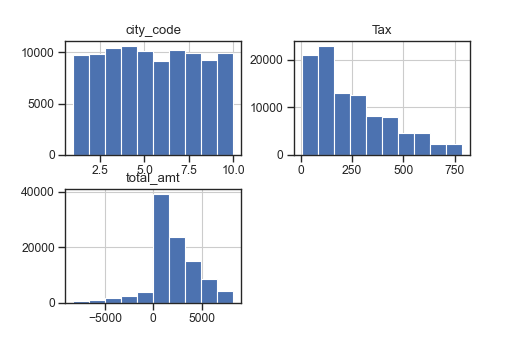

In [97]:
%matplotlib notebook
Customer_Final.select_dtypes('float64').hist()
plt.title('Histograms for continuous variables')
plt.show()


**Frequency bars for categorical variables.**

<IPython.core.display.Javascript object>


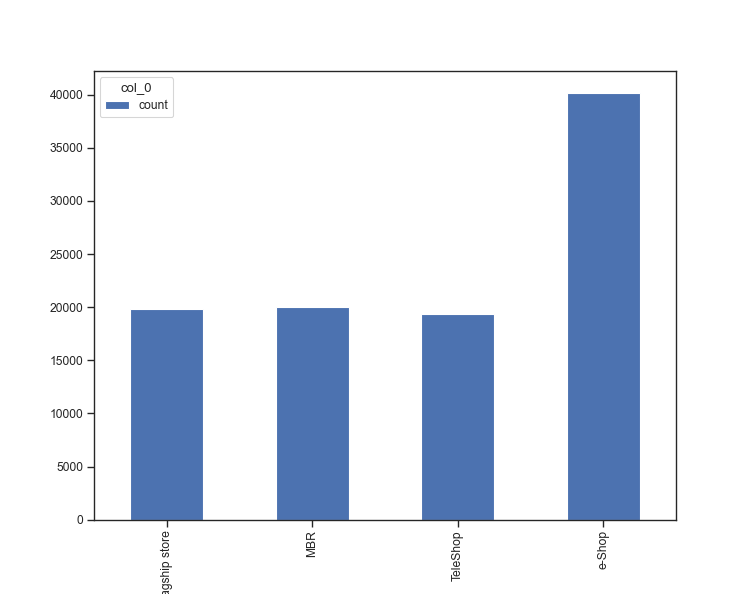

<AxesSubplot:xlabel='Store_type'>

In [116]:
Store_Count.plot(kind = 'bar',figsize = (9.5,7.5))



<IPython.core.display.Javascript object>


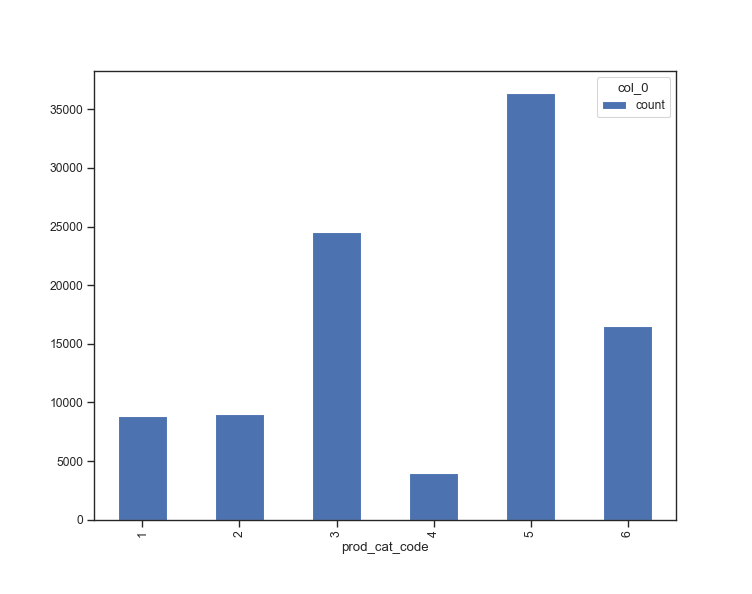

<AxesSubplot:xlabel='prod_cat_code'>

In [120]:
PROD_Count.plot(kind = 'bar',figsize = (9.5,7.5))

<IPython.core.display.Javascript object>


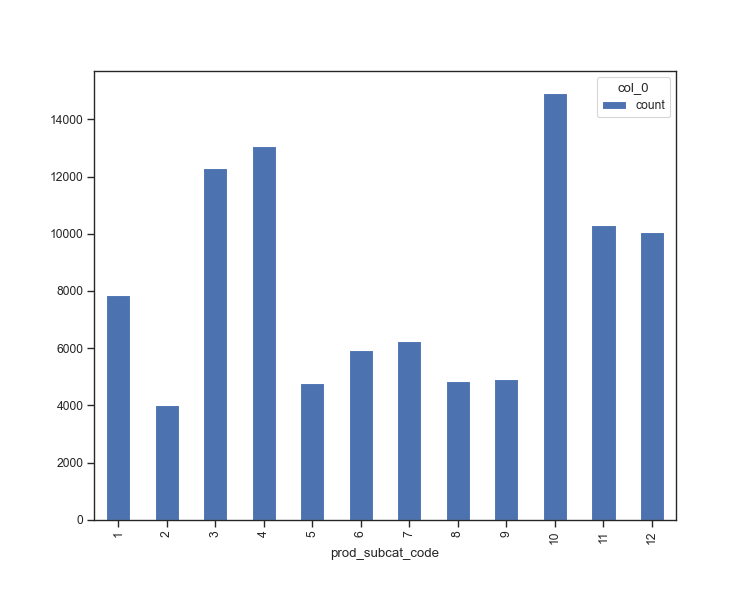

<AxesSubplot:xlabel='prod_subcat_code'>

In [121]:
SUB_Count.plot(kind = 'bar',figsize = (9.5,7.5))

<IPython.core.display.Javascript object>


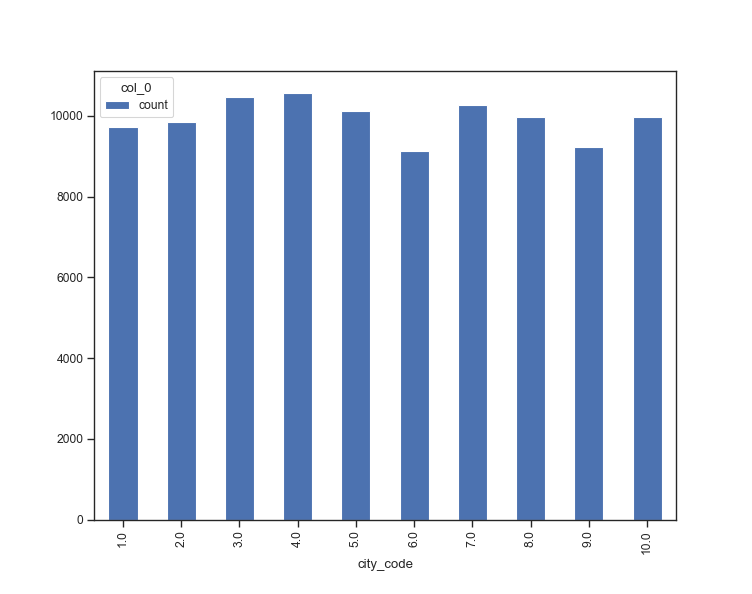

<AxesSubplot:xlabel='city_code'>

In [123]:
CITY_Count.plot(kind = 'bar',figsize = (9.5,7.5))

<IPython.core.display.Javascript object>


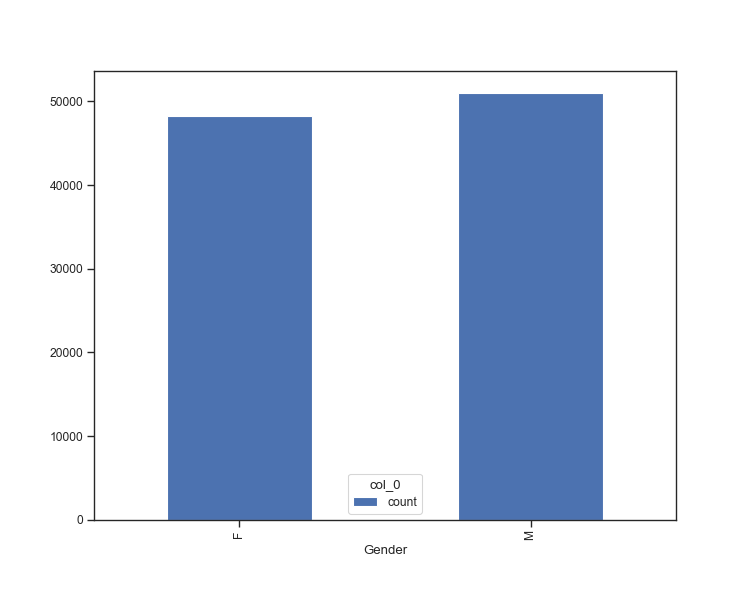

<AxesSubplot:xlabel='Gender'>

In [124]:
GENDER_Count.plot(kind = 'bar',figsize = (9.5,7.5))

<IPython.core.display.Javascript object>


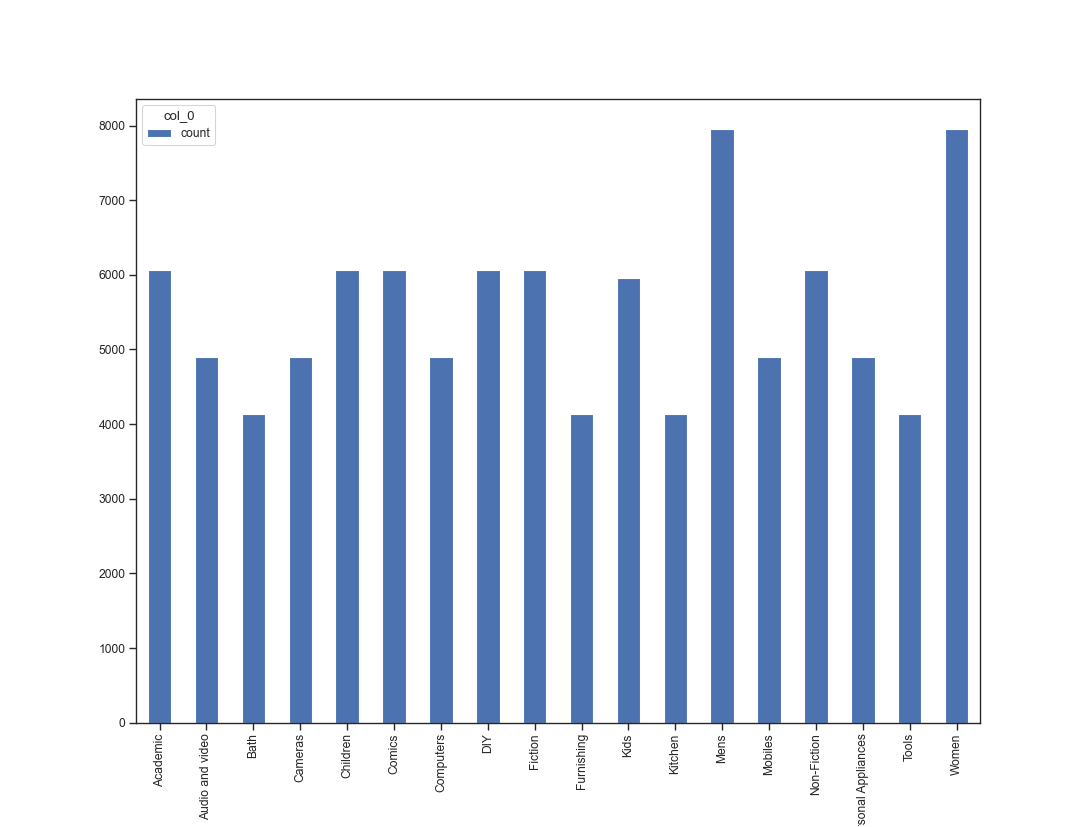

<AxesSubplot:xlabel='prod_subcat'>

In [130]:
Prodsub_Count.plot(kind = 'bar',figsize = (12.5,9.5))

 **Time period of the available transaction data**

In [160]:
import datetime as dt
last_date = Customer_Final.tran_date.head(1)
last_date = pd.to_datetime(last_date,format = '%d-%m-%Y')
last_date

0   2014-01-13
Name: tran_date, dtype: datetime64[ns]

In [161]:
first_date = Customer_Final.tran_date.tail(1)
first_date = pd.to_datetime(first_date,format = '%d/%m/%Y')
first_date

99292   2011-07-07
Name: tran_date, dtype: datetime64[ns]

In [177]:
duration = last_date - first_date

**Count of transactions where the total amount of transaction was negative.**

In [218]:
Trans = Customer_Final.groupby('transaction_id').total_amt.sum()
Trans = pd.DataFrame(Trans)
Trans[Trans.total_amt< 0].count()


total_amt    117
dtype: int64

In [219]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,1,Women


**Analyze which product categories are more popular among females vs male customers.**

In [230]:
New_data = pd.crosstab(index = Customer_Final.prod_cat,columns = Customer_Final.Gender,values = Customer_Final.transaction_id,aggfunc = 'count')

In [232]:
New_data = pd.DataFrame(New_data)
New_data

Gender,F,M
prod_cat,,
Bags,1988,2008
Books,17694,18696
Clothing,4317,4554
Electronics,11640,12850
Footwear,4587,4407
Home and kitchen,7976,8536


In [236]:
New_data = New_data.sort_values(by = ['F','M'], ascending = False)

<IPython.core.display.Javascript object>


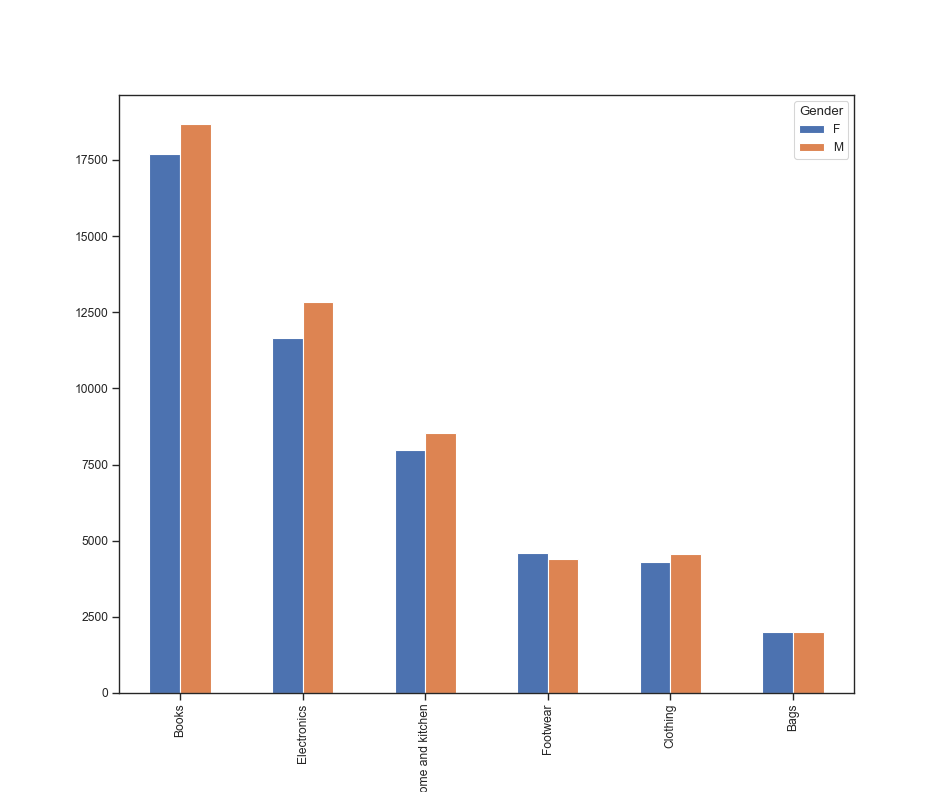

<AxesSubplot:xlabel='prod_cat'>

In [239]:
New_data.plot(kind='bar',figsize =(12, 10))

**Which City code has the maximum customers and what was the percentage of customers from 
that city?**


In [262]:
City_cust = pd.DataFrame(City_cust)
City_cust


,transaction_id
city_code,
4.0,10571
3.0,10467
7.0,10258
5.0,10116
10.0,9976
8.0,9965
2.0,9843
1.0,9717
9.0,9214


In [291]:
Total = City_cust.sum(axis = 0)


transaction_id      99257.0
Percent_of_Total        0.0
dtype: float64

In [297]:
Total = City_cust.transaction_id.sum()

In [307]:
City_cust = Customer_Final.pivot_table(index = 'city_code',values = 'transaction_id',aggfunc = 'count')
City_cust = City_cust.sort_values(by = 'transaction_id',ascending = False)
City_cust['Percent_of_Total'] = (City_cust['transaction_id']/Total*100).round(2)
City_cust



,transaction_id,Percent_of_Total
city_code,,
4.0,10571,10.65
3.0,10467,10.55
7.0,10258,10.33
5.0,10116,10.19
10.0,9976,10.05
8.0,9965,10.04
2.0,9843,9.92
1.0,9717,9.79
9.0,9214,9.28


**Which store type sells the maximum products by value and by quantity?**

In [329]:
Store_cust = Customer_Final.groupby('Store_type')['transaction_id'].count().sort_values(ascending = False)
Store_Cust = pd.DataFrame(Store_cust)
Store_Cust = Store_Cust.rename(columns = {'transaction_id' :'Quantity'})
Store_Cust['Value']= Customer_Final.groupby('Store_type')['total_amt'].sum().sort_values(ascending = False)
Store_Cust

,Quantity,Value
Store_type,,
e-Shop,40185,8.591575e+07
MBR,19974,4.170033e+07
Flagship store,19814,4.188397e+07
TeleShop,19320,4.046656e+07


In [330]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,3,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,1,Women


**What was the total amount earned from the "Electronics" and "Clothing" categories from 
Flagship Stores?**

In [705]:
New_data_n = Customer_Final.loc[(Customer_Final.prod_cat =='Clothing') | (Customer_Final.prod_cat =='Electronics'),['prod_cat','total_amt','Store_type']]
New_data_n = New_data_n[New_data_n['Store_type']== 'Flagship store']
Final_data = New_data_n.groupby('prod_cat')['total_amt'].sum()
Final_data.sum(axis=0)

14658949.889999999

**What was the total amount earned from "Male" customers under the "Electronics" category?**

In [410]:
New_data_m = Customer_Final.loc[(Customer_Final.Gender =='M') & (Customer_Final.prod_cat =='Electronics'),['Gender','prod_cat','total_amt']]
New_data_m.total_amt.sum(axis = 0)

28515547.125

**How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?**

In [422]:
Customer_Semi=Customer_Final[Customer_Final.total_amt <0]
Cust_Semi = Customer_Semi.groupby('customer_Id').transaction_id.count().sort_values(ascending = False)
Cust_Semi[Cust_Semi > 10].count()

115

In [650]:
from datetime import datetime, date
Present = pd.Timestamp.now()
Present = Present.strftime('%Y-%m-%d')
Present 


'2022-05-21'

**For all customers aged between 25 - 35, find out:**


In [676]:
from dateutil.relativedelta import relativedelta

In [690]:
DOB = Customer_Final['DOB']
Frame = pd.DataFrame(DOB)
Frame['today']=Present
Frame['today']=pd.to_datetime(Frame['today'],format = '%Y-%m-%d')
Frame['age']=Frame['today'] - Frame['DOB']
days = 365.25
Frame['AGE'] = Frame.apply(lambda x: relativedelta(x.today, x.DOB).years, axis=1)
Customer_Final['age']=Frame['AGE']
Customer_Final_age = Customer_Final[Customer_Final['age']<= 35]

In [691]:
Customer_Final_age

,customer_Id,DOB,age,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,today
25866,268923,1986-05-23,35,M,10.0,96973822521,268923,21-11-2011,6,5,1,575,60.375,635.375,e-Shop,Books,7,Fiction,2022-05-21
25867,268923,1986-05-23,35,M,10.0,96973822521,268923,21-11-2011,6,5,1,575,60.375,635.375,e-Shop,Books,12,Academic,2022-05-21
25868,268923,1986-05-23,35,M,10.0,96973822521,268923,21-11-2011,6,5,1,575,60.375,635.375,e-Shop,Books,10,Non-Fiction,2022-05-21
25869,268923,1986-05-23,35,M,10.0,96973822521,268923,21-11-2011,6,5,1,575,60.375,635.375,e-Shop,Books,11,Children,2022-05-21
25870,268923,1986-05-23,35,M,10.0,96973822521,268923,21-11-2011,6,5,1,575,60.375,635.375,e-Shop,Books,3,Comics,2022-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,271772,1992-12-17,29,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,1,Women,2022-05-21
99289,271772,1992-12-17,29,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.980,3619.980,Flagship store,Clothing,3,Kids,2022-05-21
99290,269626,1992-12-27,29,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,4,Mens,2022-05-21
99291,269626,1992-12-27,29,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,Clothing,1,Women,2022-05-21


 **What was the total amount spent for “Electronics” and “Books” product categories?**

In [692]:
New_data_age = Customer_Final.loc[(Customer_Final.prod_cat =='Electronics') | (Customer_Final.prod_cat =='Books'),['prod_cat','total_amt']]
Finale_data = New_data_age.groupby('prod_cat')['total_amt'].sum()
Finale_data.sum(axis=0)

130548482.41499999

In [695]:
Customer_Final_age.sort_values(by = 'age',ascending = False)

,customer_Id,DOB,age,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,today
25866,268923,1986-05-23,35,M,10.0,96973822521,268923,21-11-2011,6,5,1,575,60.375,635.375,e-Shop,Books,7,Fiction,2022-05-21
39285,269836,1986-06-08,35,M,2.0,12166898426,269836,5/9/2011,4,4,5,516,270.900,2850.900,TeleShop,Bags,4,Women,2022-05-21
83747,270455,1986-12-10,35,F,6.0,55801435134,270455,17-05-2013,8,3,3,1051,331.065,3484.065,e-Shop,Electronics,10,Audio and video,2022-05-21
83748,267338,1986-12-17,35,M,3.0,19769088360,267338,16-11-2012,5,3,3,207,65.205,686.205,Flagship store,Electronics,4,Mobiles,2022-05-21
83749,267338,1986-12-17,35,M,3.0,19769088360,267338,16-11-2012,5,3,3,207,65.205,686.205,Flagship store,Electronics,5,Computers,2022-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90360,271366,1992-12-06,29,M,7.0,78282610402,271366,28-03-2012,9,3,2,963,202.230,2128.230,Flagship store,Electronics,8,Personal Appliances,2022-05-21
90361,271366,1992-12-06,29,M,7.0,78282610402,271366,28-03-2012,9,3,2,963,202.230,2128.230,Flagship store,Electronics,9,Cameras,2022-05-21
90362,271366,1992-12-06,29,M,7.0,78282610402,271366,28-03-2012,9,3,2,963,202.230,2128.230,Flagship store,Electronics,10,Audio and video,2022-05-21
90363,269837,1992-12-08,29,F,10.0,5340409385,269837,5/8/2011,8,3,4,396,166.320,1750.320,Flagship store,Electronics,4,Mobiles,2022-05-21


 **What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?**

In [701]:
Customer_Final_age[(Customer_Final_age['tran_date']> '1st Jan, 2014') & (Customer_Final_age['tran_date']<'1st Mar, 2014')]

,customer_Id,DOB,age,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,today
